# Data Analysis and Plotting in Python with Pandas

_Andreas Herten, Jülich Supercomputing Centre, Forschungszentrum Jülich, 27 May 2021_

**Version: Solutions**

## Task Outline

* [Task 1](#task1)
* [Task 2](#task2)
* [Task 3](#task3)
* [Task 4](#task4)
* [Task 5](#task5)
* [Task 6](#task6)
* [Task 7](#task7)
* [Bonus Task](#taskb)

In [2]:
import pandas as pd

## Task 1
<a name="task1"></a>
<span style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* Create data frame with
    - 6 names of dinosaurs, 
    - their favourite prime number, 
    - and their favorite color.
* Play around with the frame
* Tell me when you're done with status icon in BigBlueButton: 👍

Jupyter Notebook 101:

* Execute cell: `shift+enter`
* New cell in front of current cell: `a`
* New cell after current cell: `b`

In [21]:
happy_dinos = {
    "Dinosaur Name": [],
    "Favourite Prime": [],
    "Favourite Color": []
}
#df_dinos = 

In [22]:
happy_dinos = {
    "Dinosaur Name": ["Aegyptosaurus", "Tyrannosaurus", "Panoplosaurus", "Isisaurus", "Triceratops", "Velociraptor"],
    "Favourite Prime": ["4", "8", "15", "16", "23", "42"],
    "Favourite Color": ["blue", "white", "blue", "purple", "violet", "gray"]
}
df_dinos = pd.DataFrame(happy_dinos).set_index("Dinosaur Name")
df_dinos.T

Dinosaur Name   Aegyptosaurus Tyrannosaurus Panoplosaurus Isisaurus  \
Favourite Prime             4             8            15        16   
Favourite Color          blue         white          blue    purple   

Dinosaur Name   Triceratops Velociraptor  
Favourite Prime          23           42  
Favourite Color      violet         gray

## Task 2
<a name="task2"></a>
<span style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* Read in `data-nest.csv` to `DataFrame`; call it `df`  
  *(Data was produced with [JUBE](http://www.fz-juelich.de/ias/jsc/EN/Expertise/Support/Software/JUBE/_node.html))*
* Get to know it and play a bit with it
* Tell me when you're done with status icon in BigBlueButton: 👍

In [30]:
!cat nest-data.csv | head -3

id,Nodes,Tasks/Node,Threads/Task,Runtime Program / s,Scale,Plastic,Avg. Neuron Build Time / s,Min. Edge Build Time / s,Max. Edge Build Time / s,Min. Init. Time / s,Max. Init. Time / s,Presim. Time / s,Sim. Time / s,Virt. Memory (Sum) / kB,Local Spike Counter (Sum),Average Rate (Sum),Number of Neurons,Number of Connections,Min. Delay,Max. Delay
5,1,2,4,420.42,10,true,0.29,88.12,88.18,1.14,1.20,17.26,311.52,46560664.00,825499,7.48,112500,1265738500,1.5,1.5
5,1,4,4,200.84,10,true,0.15,46.03,46.34,0.70,1.01,7.87,142.97,46903088.00,802865,7.03,112500,1265738500,1.5,1.5


In [118]:
df = pd.read_csv("data-nest.csv")
df.head()

id  Nodes  Tasks/Node  Threads/Task  Runtime Program / s  Scale  Plastic  \
0   5      1           2             4               420.42     10     True   
1   5      1           4             4               200.84     10     True   
2   5      1           2             8               202.15     10     True   
3   5      1           4             8                89.57     10     True   
4   5      2           2             4               164.16     10     True   

   Avg. Neuron Build Time / s  Min. Edge Build Time / s  \
0                        0.29                     88.12   
1                        0.15                     46.03   
2                        0.28                     47.98   
3                        0.15                     20.41   
4                        0.20                     40.03   

   Max. Edge Build Time / s  ...  Max. Init. Time / s  Presim. Time / s  \
0                     88.18  ...                 1.20             17.26   
1                     46.34  ...                 1.01              7.87   
2                     48.48  ...                 1.20              7.95   
3                     23.21  ...                 3.04              3.19   
4                     41.09  ...                 1.58              6.08   

   Sim. Time / s  Virt. Memory (Sum) / kB  Local Spike Counter (Sum)  \
0         311.52               46560664.0                     825499   
1         142.97               46903088.0                     802865   
2         142.81               47699384.0                     802865   
3          60.31               46813040.0                     821491   
4         114.88               46937216.0                     802865   

   Average Rate (Sum)  Number of Neurons  Number of Connections  Min. Delay  \
0                7.48             112500             1265738500         1.5   
1                7.03             112500             1265738500         1.5   
2                7.03             112500             1265738500         1.5   
3                7.23             112500             1265738500         1.5   
4                7.03             112500             1265738500         1.5   

   Max. Delay  
0         1.5  
1         1.5  
2         1.5  
3         1.5  
4         1.5  

[5 rows x 21 columns]

## Task 3
<a name="task3"></a>
<span style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* Add a column to the Nest data frame form Task 2 called `Threads` which is the total number of threads across all nodes (i.e. the product of threads per task and tasks per node and nodes)
* Tell me when you're done with status icon in BigBlueButton: 👍

In [59]:
df["Threads"] = df["Nodes"] * df["Tasks/Node"] * df["Threads/Task"]
df.head()

id  Nodes  Tasks/Node  Threads/Task  Runtime Program / s  Scale  Plastic  \
0   5      1           2             4               420.42     10     True   
1   5      1           4             4               200.84     10     True   
2   5      1           2             8               202.15     10     True   
3   5      1           4             8                89.57     10     True   
4   5      2           2             4               164.16     10     True   

   Avg. Neuron Build Time / s  Min. Edge Build Time / s  \
0                        0.29                     88.12   
1                        0.15                     46.03   
2                        0.28                     47.98   
3                        0.15                     20.41   
4                        0.20                     40.03   

   Max. Edge Build Time / s  ...  Presim. Time / s  Sim. Time / s  \
0                     88.18  ...             17.26         311.52   
1                     46.34  ...              7.87         142.97   
2                     48.48  ...              7.95         142.81   
3                     23.21  ...              3.19          60.31   
4                     41.09  ...              6.08         114.88   

   Virt. Memory (Sum) / kB  Local Spike Counter (Sum)  Average Rate (Sum)  \
0               46560664.0                     825499                7.48   
1               46903088.0                     802865                7.03   
2               47699384.0                     802865                7.03   
3               46813040.0                     821491                7.23   
4               46937216.0                     802865                7.03   

   Number of Neurons  Number of Connections  Min. Delay  Max. Delay  Threads  
0             112500             1265738500         1.5         1.5        8  
1             112500             1265738500         1.5         1.5       16  
2             112500             1265738500         1.5         1.5       16  
3             112500             1265738500         1.5         1.5       32  
4             112500             1265738500         1.5         1.5       16  

[5 rows x 22 columns]

In [60]:
df.columns

Index(['id', 'Nodes', 'Tasks/Node', 'Threads/Task', 'Runtime Program / s',
       'Scale', 'Plastic', 'Avg. Neuron Build Time / s',
       'Min. Edge Build Time / s', 'Max. Edge Build Time / s',
       'Min. Init. Time / s', 'Max. Init. Time / s', 'Presim. Time / s',
       'Sim. Time / s', 'Virt. Memory (Sum) / kB', 'Local Spike Counter (Sum)',
       'Average Rate (Sum)', 'Number of Neurons', 'Number of Connections',
       'Min. Delay', 'Max. Delay', 'Threads'],
      dtype='object')

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

## Task 4
<a name="task4"></a>
<span style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>


* Sort the data frame by threads
* Plot `"Presim. Time / s"` and `"Sim. Time / s"` of our data frame `df` as a function of threads
* Use a dashed, red line for `"Presim. Time / s"`, a blue line for `"Sim. Time / s"` (see [API description](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot))
* Don't forget to label your axes and to add a legend _(1st rule of plotting)_
* Tell me when you're done with status icon in BigBlueButton: 👍

In [67]:
df.sort_values(["Threads", "Nodes", "Tasks/Node", "Threads/Task"], inplace=True)

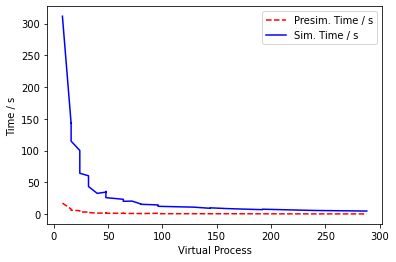

In [68]:
fig, ax = plt.subplots()
ax.plot(df["Threads"], df["Presim. Time / s"], linestyle="dashed", color="red", label="Presim. Time / s")
ax.plot(df["Threads"], df["Sim. Time / s"], "-b", label="Sim. Time / s")
ax.set_xlabel("Virtual Process")
ax.set_ylabel("Time / s")
ax.legend(loc='best');

## Task 5
<a name="task5"></a>
<span style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

Use the NEST data frame `df` to:

1. Make the threads the index of the data frame (`.set_index()`)
2. Plot `"Presim. Program / s"` and `"Sim. Time / s`" individually
3. Plot them onto one common canvas!
4. Make them have the same line colors and styles as before
5. Add a legend, add missing axes labels
6. Tell me when you're done with status icon in BigBlueButton: 👍

In [74]:
df.set_index("Threads", inplace=True)

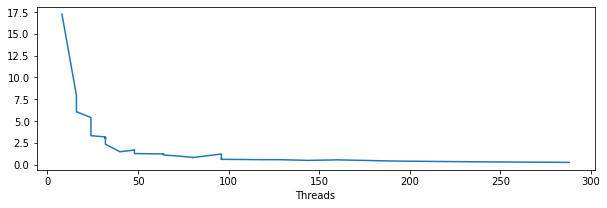

In [75]:
df["Presim. Time / s"].plot(figsize=(10, 3));

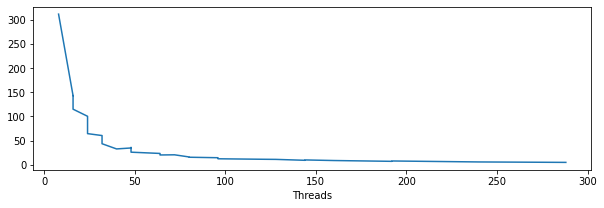

In [76]:
df["Sim. Time / s"].plot(figsize=(10, 3));

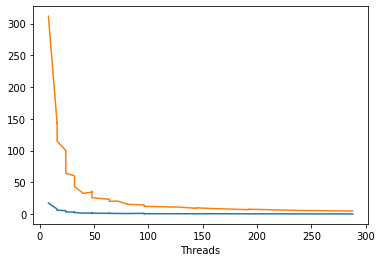

In [77]:
df["Presim. Time / s"].plot();
df["Sim. Time / s"].plot();

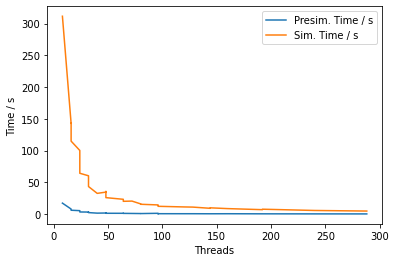

In [78]:
ax = df[["Presim. Time / s", "Sim. Time / s"]].plot();
ax.set_ylabel("Time / s");

## Task 6
<a name="task6"></a>
<span style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* To your `df` NEST data frame, add a column with the unaccounted time (`Unaccounted Time / s`), which is the difference of program runtime, average neuron build time, minimal edge build time, minimal initialization time, presimulation time, and simulation time.  
(*I know this is technically not super correct, but it will do for our example.*)
* Plot a stacked bar plot of all these columns (except for program runtime) over the threads
* Tell me when you're done with status icon in BigBlueButton: 👍

In [102]:
cols = [
    'Avg. Neuron Build Time / s', 
    'Min. Edge Build Time / s', 
    'Min. Init. Time / s', 
    'Presim. Time / s', 
    'Sim. Time / s'
]
df["Unaccounted Time / s"] = df['Runtime Program / s']
for entry in cols:
    df["Unaccounted Time / s"] = df["Unaccounted Time / s"] - df[entry]

In [103]:
df[["Runtime Program / s", "Unaccounted Time / s", *cols]].head(2)

Runtime Program / s  Unaccounted Time / s  \
Threads                                              
8                     420.42                  2.09   
16                    202.15                  2.43   

         Avg. Neuron Build Time / s  Min. Edge Build Time / s  \
Threads                                                         
8                              0.29                     88.12   
16                             0.28                     47.98   

         Min. Init. Time / s  Presim. Time / s  Sim. Time / s  
Threads                                                        
8                       1.14             17.26         311.52  
16                      0.70              7.95         142.81

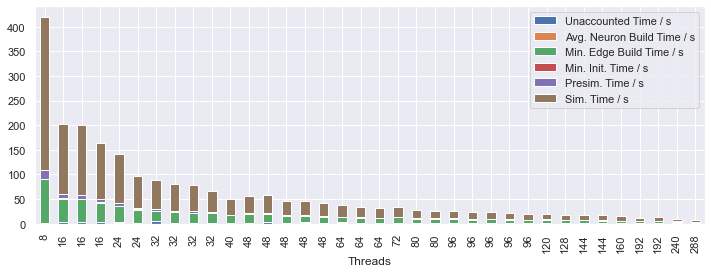

In [104]:
df[["Unaccounted Time / s", *cols]].plot(kind="bar", stacked=True, figsize=(12, 4));

## Task 7
<a name="task7"></a>
<span style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* Create a pivot table based on the NEST `df` data frame
* Let the `x` axis show the number of nodes; display the values of the simulation time `"Sim. Time / s"` for the tasks per node and threads per task configurations
* Please plot a bar plot
* Tell me when you're done with status icon in BigBlueButton: 👍

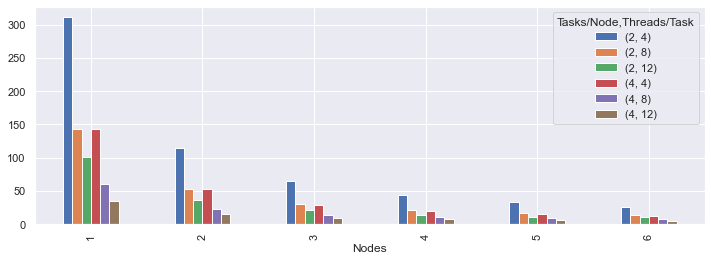

In [116]:
df.pivot_table(
    index="Nodes",
    columns=["Tasks/Node", "Threads/Task"],
    values="Sim. Time / s",
).plot(kind="bar", figsize=(12, 4));

<a name="taskb"></a>

* Bonus task
    - Same pivot table as before (that is, `x` with nodes, and columns for Tasks/Node and Threads/Task)
    - But now, use `Sim. Time / s` and `Presim. Time / s` as values to show
    - Show them as a stack of those two values inside the pivot table

<span class="feedback">Feedback to <a href="mailto:a.herten@fz-juelich.de">a.herten@fz-juelich.de</a></span>

Next slide: Further reading